In [ ]:
import xml.etree.ElementTree as ET

root = ET.parse('enquiry.xls')

# Define the namespace
namespace = {'ss': 'urn:schemas-microsoft-com:office:spreadsheet'}

rows = root.findall("./ss:Worksheet/ss:Table/ss:Row", namespace)
print(len(rows))

# for row in rows:
#     data_elements = row.findall("ss:Cell/ss:Data", namespace)
#     print('SRow' + '-'*100)
#     for data_element in data_elements:
#         data_text = data_element.text
#         print("Data Text:", data_text)
#     print('ERow'+ '-'*100)
ap_ = []
for c_row ,v_row in enumerate(rows):
    data_elements = v_row.findall("ss:Cell/ss:Data", namespace)
    # print(data_elements)
    print('-'*130)
    for c_de,v_de in enumerate(data_elements):
        data_text = v_de.text
        print(str(c_de) + " Data Text:", data_text)
        ap_.append(data_text)

In [ ]:
ap_.pop(0)  # ลบ 'Report enquiry :Startdate 2023-07-20 to 2023-07-20 Export time [2023-07-21 12:46:28]'

In [ ]:
rows = root.findall("./ss:Worksheet/ss:Table/ss:Row", namespace)
print(len(rows))

In [ ]:
namespace = {'ss': 'urn:schemas-microsoft-com:office:spreadsheet'}

rows = root.findall("./ss:Worksheet/ss:Table/ss:Row/ss:Cell/ss:Data", namespace)

len(rows)

In [ ]:
sl = [ap_[i:i+44] for i in range(0, len(ap_), 44)]

# ตรวจสอบผลลัพธ์
for idx, sublist in enumerate(sl, start=1):
    # print(f"List {idx}: {sublist}")
    print(idx,sublist)

In [ ]:
column = sl[0] # ตั้งชื่อ คอลัมน์
column

In [ ]:
sl.pop(0) # ลบหัวแถวออก

In [ ]:
sl

In [ ]:
import pandas as pd

pd.set_option('display.max_columns',None)

df = pd.DataFrame(sl,columns=column)
df


In [ ]:
df[['เลขเคลม','เลขรับแจ้ง','เลขเซอเวย์','อำเภอที่เกิดเหตุ','จังหวัดที่เกิดเหตุ','อำเภอที่ออกตรวจสอบ','จังหวัดที่ออกตรวจสอบ','พนักงานตรวจสอบ','เหตุผลการจ่ายงาน','ใช้เซอร์เวย์นอก',
    'ประเภทเคลม(ว.4/นัดหมาย)','ใน/นอก(เวลางาน)','นอกพื้นที่','วันที่/เวลารับแจ้ง','วันที่/เวลาจ่ายงาน','วันที่/เวลารับงาน','วันที่/เวลาถึง ว.22','วันที่/เวลาเสร็จงาน ว.14','วันที่/เวลาส่งรายงาน','ผู้รับแจ้ง','ผู้จ่ายงาน','ผู้ตรวจสอบงาน','วันที่/เวลาตรวจสอบ','สถานะงาน']]

In [ ]:
# df[df['ผู้จ่ายงาน']=='ปิยะณัฐ ขานไธสง']

In [ ]:
# df[(df['ผู้รับแจ้ง']=='ปิยะณัฐ') & (df['ผู้จ่ายงาน']=='ปิยะณัฐ ขานไธสง')]

In [ ]:
dfx = df['ผู้รับแจ้ง'].fillna('sesurvey')
dfx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.font_manager.fontManager.addfont(r'C:\Users\88888888\Desktop\gg-main\THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=10)

# x = dfx
# y = np.arange(1,262)


# plt.bar(x,y)
# plt.show()

dfx.value_counts().plot(kind='barh')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.font_manager.fontManager.addfont(r'C:\Users\88888888\Desktop\gg-main\THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=10)


# # สร้างกราฟแบบ bar โดยกำหนดชื่อประเทศเป็นแกน x และจำนวนประชากรเป็นแกน y
# ax = df.plot(x='ประเทศ', y='จำนวนประชากร', kind='bar', legend=False)

# # แสดงค่าบนแท่ง
# for index, value in enumerate(df['จำนวนประชากร']):
#     ax.text(index, value, str(value), ha='center', va='bottom')

# # กำหนดชื่อแกน x และ y และชื่อกราฟ
# plt.xlabel('ประเทศ')
# plt.ylabel('จำนวนประชากร')
# plt.title('กราฟแสดงจำนวนประชากรของแต่ละประเทศ')

# # แสดงกราฟ
# plt.show()

# dfx.plot(x='xx',y=dfx.value_counts,kind='bar')

ax = dfx.value_counts().plot(kind='bar',legend=False)

for index , value in enumerate(dfx.value_counts()):
    ax.text(index,value,str(value), ha='center')


In [ ]:
numpy_value = dfx.value_counts().values
value_list = numpy_value.tolist()

numpy_index = dfx.value_counts().index
index_list = numpy_index.tolist()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่าง
data = {
    'ชื่อพนักงานรับแจ้ง': index_list,
    'จำนวนสายที่รับ': value_list
}

# แปลงข้อมูลเป็น DataFrame ของ pandas
df = pd.DataFrame(data)

# สร้างกราฟแบบ barh โดยกำหนดชื่อประเทศเป็นแกน y และจำนวนประชากรเป็นแกน x
ax = df.plot(x='ชื่อพนักงานรับแจ้ง', y='จำนวนสายที่รับ', kind='barh', legend=False)

# แสดงค่าบนแท่ง
for index, value in enumerate(df['จำนวนสายที่รับ']):
    ax.text(value, index, str(value), ha='left', va='center')

# กำหนดชื่อแกน x และ y และชื่อกราฟ
plt.xlabel('จำนวนสายที่รับ')
plt.ylabel('รายชื่อพนักงานรับแจ้ง')
plt.title('กราฟแสดงจำนวนสายที่รับ')

# แสดงกราฟ
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.font_manager.fontManager.addfont(r'C:\Users\88888888\Desktop\gg-main\THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=14)

# สร้างข้อมูลตัวอย่าง
data = {
    'ประเทศ': ['ประเทศ A', 'ประเทศ B', 'ประเทศ C', 'ประเทศ D'],
    'จำนวนประชากร': [500, 700, 400, 600]
}

# แปลงข้อมูลเป็น DataFrame ของ pandas
df = pd.DataFrame(data)

# สร้างกราฟแบบ bar โดยกำหนดชื่อประเทศเป็นแกน x และจำนวนประชากรเป็นแกน y
ax = df.plot(x='ประเทศ', y='จำนวนประชากร', kind='bar', legend=False)

# แสดงค่าบนแท่ง
for index, value in enumerate(df['จำนวนประชากร']):
    ax.text(index,value, str(value), ha='center', va='bottom')

# กำหนดชื่อแกน x และ y และชื่อกราฟ
plt.xlabel('ประเทศ')
plt.ylabel('จำนวนประชากร')
plt.title('กราฟแสดงจำนวนประชากรของแต่ละประเทศ')

# แสดงกราฟ
plt.show()


In [ ]:
dfx.value_counts()

In [ ]:
import matplotlib as mpl
mpl.__version__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่าง
data = {
    'ประเทศ': ['ประเทศ A', 'ประเทศ B', 'ประเทศ C', 'ประเทศ D'],
    'จำนวนประชากร': [500, 700, 400, 600]
}

# แปลงข้อมูลเป็น DataFrame ของ pandas
df = pd.DataFrame(data)

# สร้างกราฟแบบ barh โดยกำหนดชื่อประเทศเป็นแกน y และจำนวนประชากรเป็นแกน x
ax = df.plot(x='ประเทศ', y='จำนวนประชากร', kind='barh', legend=False)

# แสดงค่าบนแท่ง
for index, value in enumerate(df['จำนวนประชากร']):
    ax.text(value, index, str(value), ha='left', va='center')

# กำหนดชื่อแกน x และ y และชื่อกราฟ
plt.xlabel('จำนวนประชากร')
plt.ylabel('ประเทศ')
plt.title('กราฟแสดงจำนวนประชากรของแต่ละประเทศ')

# แสดงกราฟ
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

# สร้างข้อมูลตัวอย่าง
data = {
    'ประเทศ': ['ประเทศ A', 'ประเทศ B', 'ประเทศ C', 'ประเทศ D'],
    'จำนวนประชากร': [500, 700, 400, 600]
}

# แปลงข้อมูลเป็น DataFrame ของ pandas
df = pd.DataFrame(data)

# สร้างกราฟแบบ barh โดยกำหนดชื่อประเทศเป็นแกน y และจำนวนประชากรเป็นแกน x
ax = df.plot(x='ประเทศ', y='จำนวนประชากร', kind='barh', legend=False)

# แสดงค่าบนแท่ง
for index, value in enumerate(df['จำนวนประชากร']):
    ax.text(value, index, str(value), ha='left', va='center')

# กำหนดชื่อแกน x และ y และชื่อกราฟ
plt.xlabel('จำนวนประชากร')
plt.ylabel('ประเทศ')
plt.title('กราฟแสดงจำนวนประชากรของแต่ละประเทศ')

# แสดงกราฟ
plt.show()

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np

chart_data = pd.DataFrame(
    np.random.randn(20, 3),
    columns=['a', 'b', 'c'])

chart_data.plot()

In [ ]:
import pandas as pd
import streamlit as st

# โหลดข้อมูล
dd = {
    'country': ['ประเทศ A', 'ประเทศ B', 'ประเทศ C', 'ประเทศ D'],
    'population': [500, 700, 400, 600]
}



df = pd.DataFrame(dd)

df.plot.barh(x='country', y='population', stacked=True).set_facecolor('lightblue')

# เปลี่ยนสีพื้นหลัง
ax.set_facecolor('lightblue')

# แสดงแผนภูมิ
# st.pyplot(df)


In [87]:
import pandas as pd

read_csv = pd.read_csv(r'/Users/macmini/Downloads/จบงาน.csv')

In [88]:
df = pd.DataFrame(read_csv)

In [89]:
df = df.drop(columns=['Unnamed: 0']) # ลบ Columns แรกออก


In [91]:
df['เลขเคลม']= df['เลขเคลม'].astype('str')
df['เลขรับแจ้ง']= df['เลขรับแจ้ง'].astype('str').str.replace(".0", "")
df

,เลขเคลม,เลขรับแจ้ง,เลขเซอเวย์,อำเภอที่เกิดเหตุ,จังหวัดที่เกิดเหตุ,อำเภอที่ออกตรวจสอบ,จังหวัดที่ออกตรวจสอบ,พนักงานตรวจสอบ,เหตุผลการจ่ายงาน,ใช้เซอร์เวย์นอก,...,วันที่/เวลาจ่ายงาน,วันที่/เวลารับงาน,วันที่/เวลาถึง ว.22,วันที่/เวลาเสร็จงาน ว.14,วันที่/เวลาส่งรายงาน,ผู้รับแจ้ง,ผู้จ่ายงาน,ผู้ตรวจสอบงาน,วันที่/เวลาตรวจสอบ,สถานะงาน
0,2022013166051,nan,SEABI-310230702292,เขตหนองจอก,กรุงเทพฯ,เขตหนองจอก,กรุงเทพฯ,SE151ศราวุธ เสนีย์ชัย,ติดตางาน,ไม่ใช้,...,2023-07-20 14:53,2023-07-21T08:57:00,2023-07-21 08:57,2023-07-21T08:57:00,2023-07-23 12:32,ปิยะณัฐ,ปิยะณัฐ ขานไธสง,นาย ศุภชัย เศรษฐชัยชาญ,2023-07-23T20:33:00,จบงาน
1,2023013032000,nan,SEABI-470230700058,ดำเนินสะดวก,ราชบุรี,ดำเนินสะดวก,ราชบุรี,SEC232 ​นาย ธนิศ ชูระเชตุ,ติดตางาน,ไม่ใช้,...,2023-07-20 11:09,2023-07-20T11:31:00,2023-07-20 12:04,2023-07-20T14:06:00,2023-07-21 08:23,ปิยะณัฐ,ปิยะณัฐ ขานไธสง,นายวรภพ หัตถิยา,2023-07-21T14:34:00,จบงาน
2,2023013034351,nan,SEABI-319230700062,วิหารแดง,สระบุรี,วิหารแดง,สระบุรี,SEC98 นาย วัชระ โพธิ์มัจฉา,ติดตามงาน,ไม่ใช้,...,2023-07-20 14:50,2023-07-20T15:11:00,2023-07-20 15:11,2023-07-21T02:55:00,2023-07-22 02:04,ปิยะณัฐ,ปิยะณัฐ ขานไธสง,นายภูรี ชูลาภโชคทวี,2023-07-25T09:05:00,จบงาน
3,2023013035825,2023123982,SEABI-113230700340,ธัญบุรี,ปทุมธานี,ธัญบุรี,ปทุมธานี,SE275 นาย คมกริช ทองขาว,จ่ายเวร 1,ไม่ใช้,...,2023-07-20 07:38,2023-07-20T08:40:00,2023-07-20 09:19,2023-07-20T09:37:00,2023-07-20 21:14,เดชา จันทะทัย (SE),นายคธากร สุดคนึง,นายภูรี ชูลาภโชคทวี,2023-07-21T13:46:00,จบงาน
4,2023013035917,2023124213,SEABI-186230700055,ปะทิว,ชุมพร,ปะทิว,ชุมพร,SEC277 นาย ไชยา ศรียาภัย,จ่ายเวร 1,ไม่ใช้,...,2023-07-20 07:48,2023-07-20T11:30:00,2023-07-20 14:28,2023-07-20T14:48:00,2023-07-20 23:13,ศรุตยา ศรีธนขันธุ(SE),นายคธากร สุดคนึง,นายวรภพ หัตถิยา,2023-07-21T15:16:00,จบงาน
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023013700558,nan,SEABI-310230702283,เขตสาทร,กรุงเทพฯ,เขตสาทร,กรุงเทพฯ,บริษัท เอ็ม.พี.เคลม จำกัด,งานติดตาม,ใช้,...,2023-07-20 13:31,2023-07-20T13:40:00,2023-07-20 14:00,2023-07-20T14:45:00,2023-07-20 14:22,NaN,น.ส.อรพิน ชุมพงษ์,นายภูรี ชูลาภโชคทวี,2023-07-20T15:20:00,จบงาน
241,2023013700558,nan,SEABI-310230702283,เขตสาทร,กรุงเทพฯ,เขตสาทร,กรุงเทพฯ,บริษัท เอ็ม.พี.เคลม จำกัด,งานติดตาม,ใช้,...,2023-07-20 13:31,2023-07-20T13:40:00,2023-07-20 14:00,2023-07-20T14:45:00,2023-07-20 14:22,NaN,น.ส.อรพิน ชุมพงษ์,นายภูรี ชูลาภโชคทวี,2023-07-20T15:20:00,จบงาน
242,2023013700558,nan,SEABI-310230702283,เขตสาทร,กรุงเทพฯ,เขตสาทร,กรุงเทพฯ,บริษัท เอ็ม.พี.เคลม จำกัด,งานติดตาม,ใช้,...,2023-07-20 13:31,2023-07-20T13:40:00,2023-07-20 14:00,2023-07-20T14:45:00,2023-07-20 14:22,NaN,น.ส.อรพิน ชุมพงษ์,นายภูรี ชูลาภโชคทวี,2023-07-20T15:20:00,จบงาน
243,2023013700895,2023124982,SEABI-212230700318,เมืองนนทบุรี,นนทบุรี,เมืองนนทบุรี,นนทบุรี,SE241 นาย ธรรมนูญ เมืองปฐม,เวร2ตามคิว,ไม่ใช้,...,2023-07-20 17:32,2023-07-20T17:37:00,2023-07-20 18:07,2023-07-20T19:10:00,2023-07-21 14:43,ขนิษฐา ฉายินทุ (SE),นายภัทร์นรินทร์ นาคทองอินทร์,นายภูรี ชูลาภโชคทวี,2023-07-23T15:31:00,จบงาน


In [92]:
df.to_excel(r'/Users/macmini/Downloads/จบงาน.xlsx',index=False)

<Axes: >

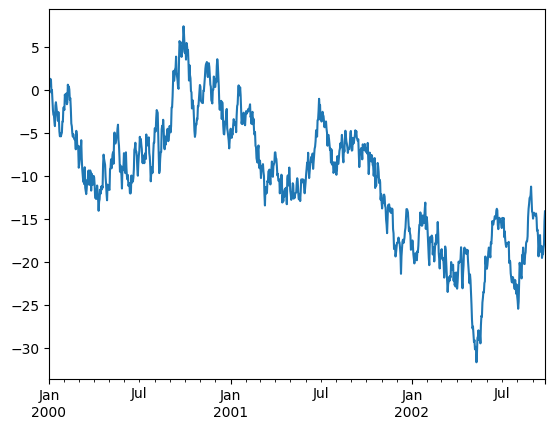

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

In [103]:
import pandas as pd

nump = np.random.randn(10)

nump

array([ 1.61558507, -1.58661799, -0.05013628,  0.91301992, -1.52632095,
       -0.82071474,  1.02812797,  0.41416338, -0.51230796, -0.80902368])

In [104]:
days = pd.date_range("1/1/2000", periods=10)
days

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [122]:
nump



array([ 1.49550142e+00,  8.59927001e-01, -7.82692410e-04, -2.00315472e+00,
       -6.02717395e-01])

In [114]:
df_random = pd.DataFrame(nump,columns=['Random'])
df_periods = pd.DataFrame(days,columns=['Periods'])

In [117]:
df = pd.concat([df_random,df_periods],axis=1)
df

,Random,Periods
0,1.615585,2000-01-01
1,-1.586618,2000-01-02
2,-0.050136,2000-01-03
3,0.913020,2000-01-04
4,-1.526321,2000-01-05
5,-0.820715,2000-01-06
6,1.028128,2000-01-07
7,0.414163,2000-01-08
8,-0.512308,2000-01-09
9,-0.809024,2000-01-10


In [118]:
nump = np.random.randn(5)
days = pd.date_range("1/1/2000", periods=5)

In [119]:
data = {
    'Random' : nump,
    'Periods' : days
}

In [120]:
pd.DataFrame(data)

,Random,Periods
0,1.495501,2000-01-01
1,0.859927,2000-01-02
2,-0.000783,2000-01-03
3,-2.003155,2000-01-04
4,-0.602717,2000-01-05
